In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('heart.csv')

In [6]:
df.shape

(303, 14)

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1. Preprocessing Data

#### checking for null values in the dataset 

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

no null values are found <br>

checking the features datatypes


In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

##### 0 is for person not having heart disease 
<br>

##### 1 is for person having a heart disease 

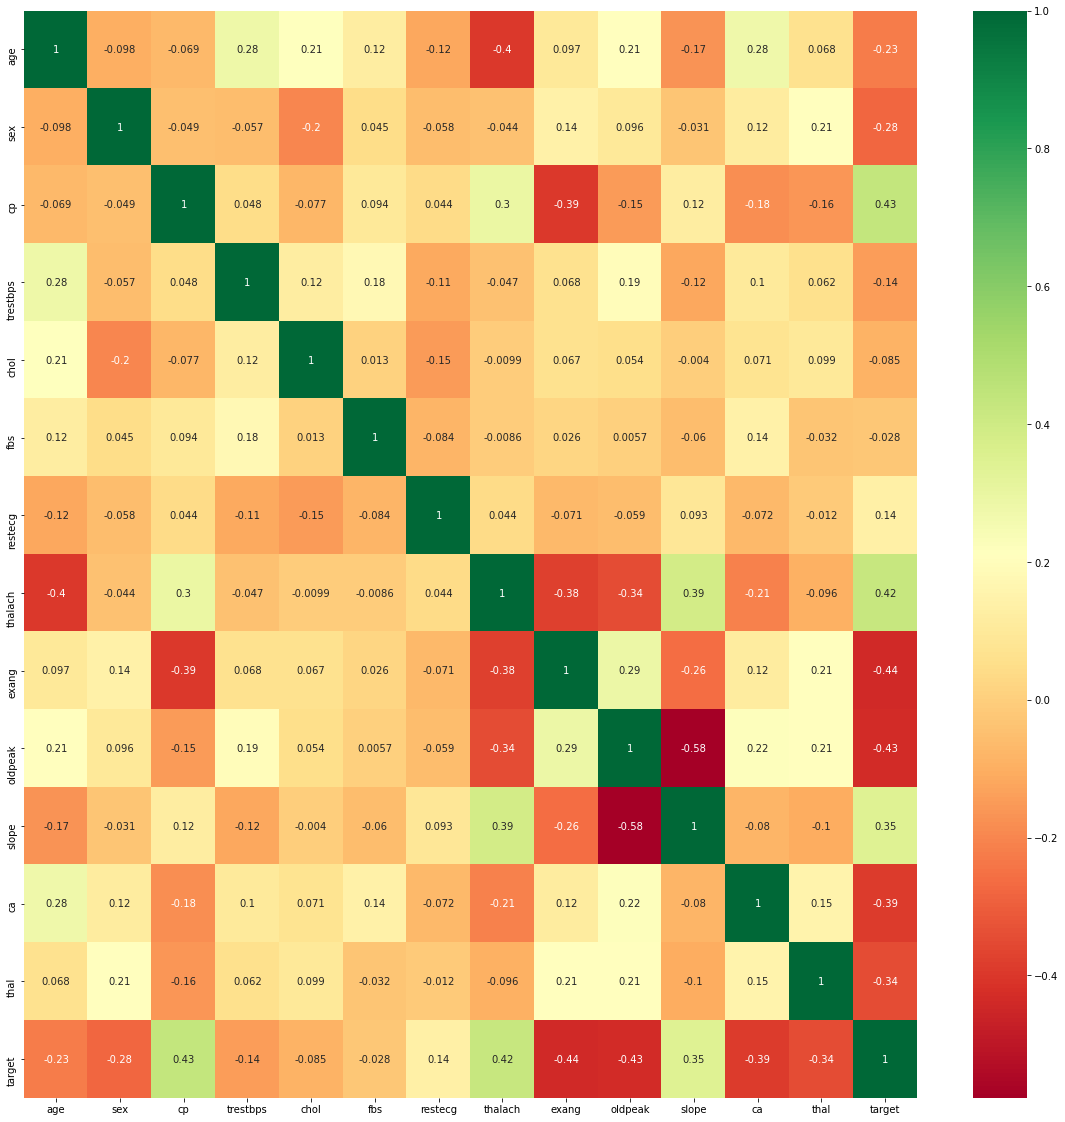

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_features=df.corr()
corr_index=corr_features.index
plt.figure(figsize=(20,20))
s=sns.heatmap(data=df[corr_index].corr(),annot=True,cmap='RdYlGn')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

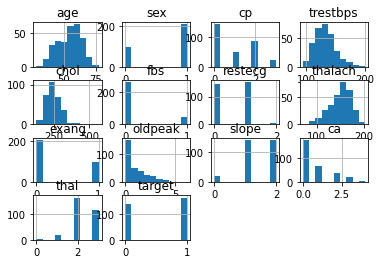

In [13]:
df.hist()

<AxesSubplot:xlabel='target', ylabel='count'>

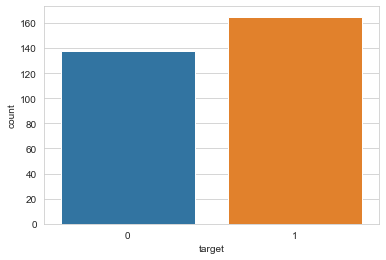

In [14]:
sns.set_style("whitegrid")
sns.countplot(x='target',data=df)

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
#df['thal'].value_counts()
#sex cp fbs restecg exang slope ca thal

after observing the dataset it can be seen that we have some categorical features in the dataset so we will be making summy variables for each categorical fatures in the dataset so that the machine learning algorithm performs well

In [17]:
data=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [18]:
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaling_columns=['age','trestbps','chol','thalach','oldpeak']
sc=StandardScaler()
data[scaling_columns]=sc.fit_transform(data[scaling_columns])

In [21]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Splitting data between training and testing 

In [22]:
from sklearn.model_selection import train_test_split
y=data['target']
x=data.drop(columns=['target'])


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)

In [24]:
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
print(x_train.shape)

(61, 30)
(61,)
(242,)
(242, 30)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [49]:
neighbors_score=[]
for i in range(1,21):
    kclassifier=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(kclassifier,x_train,y_train,cv=5)
    neighbors_score.append(score.mean())

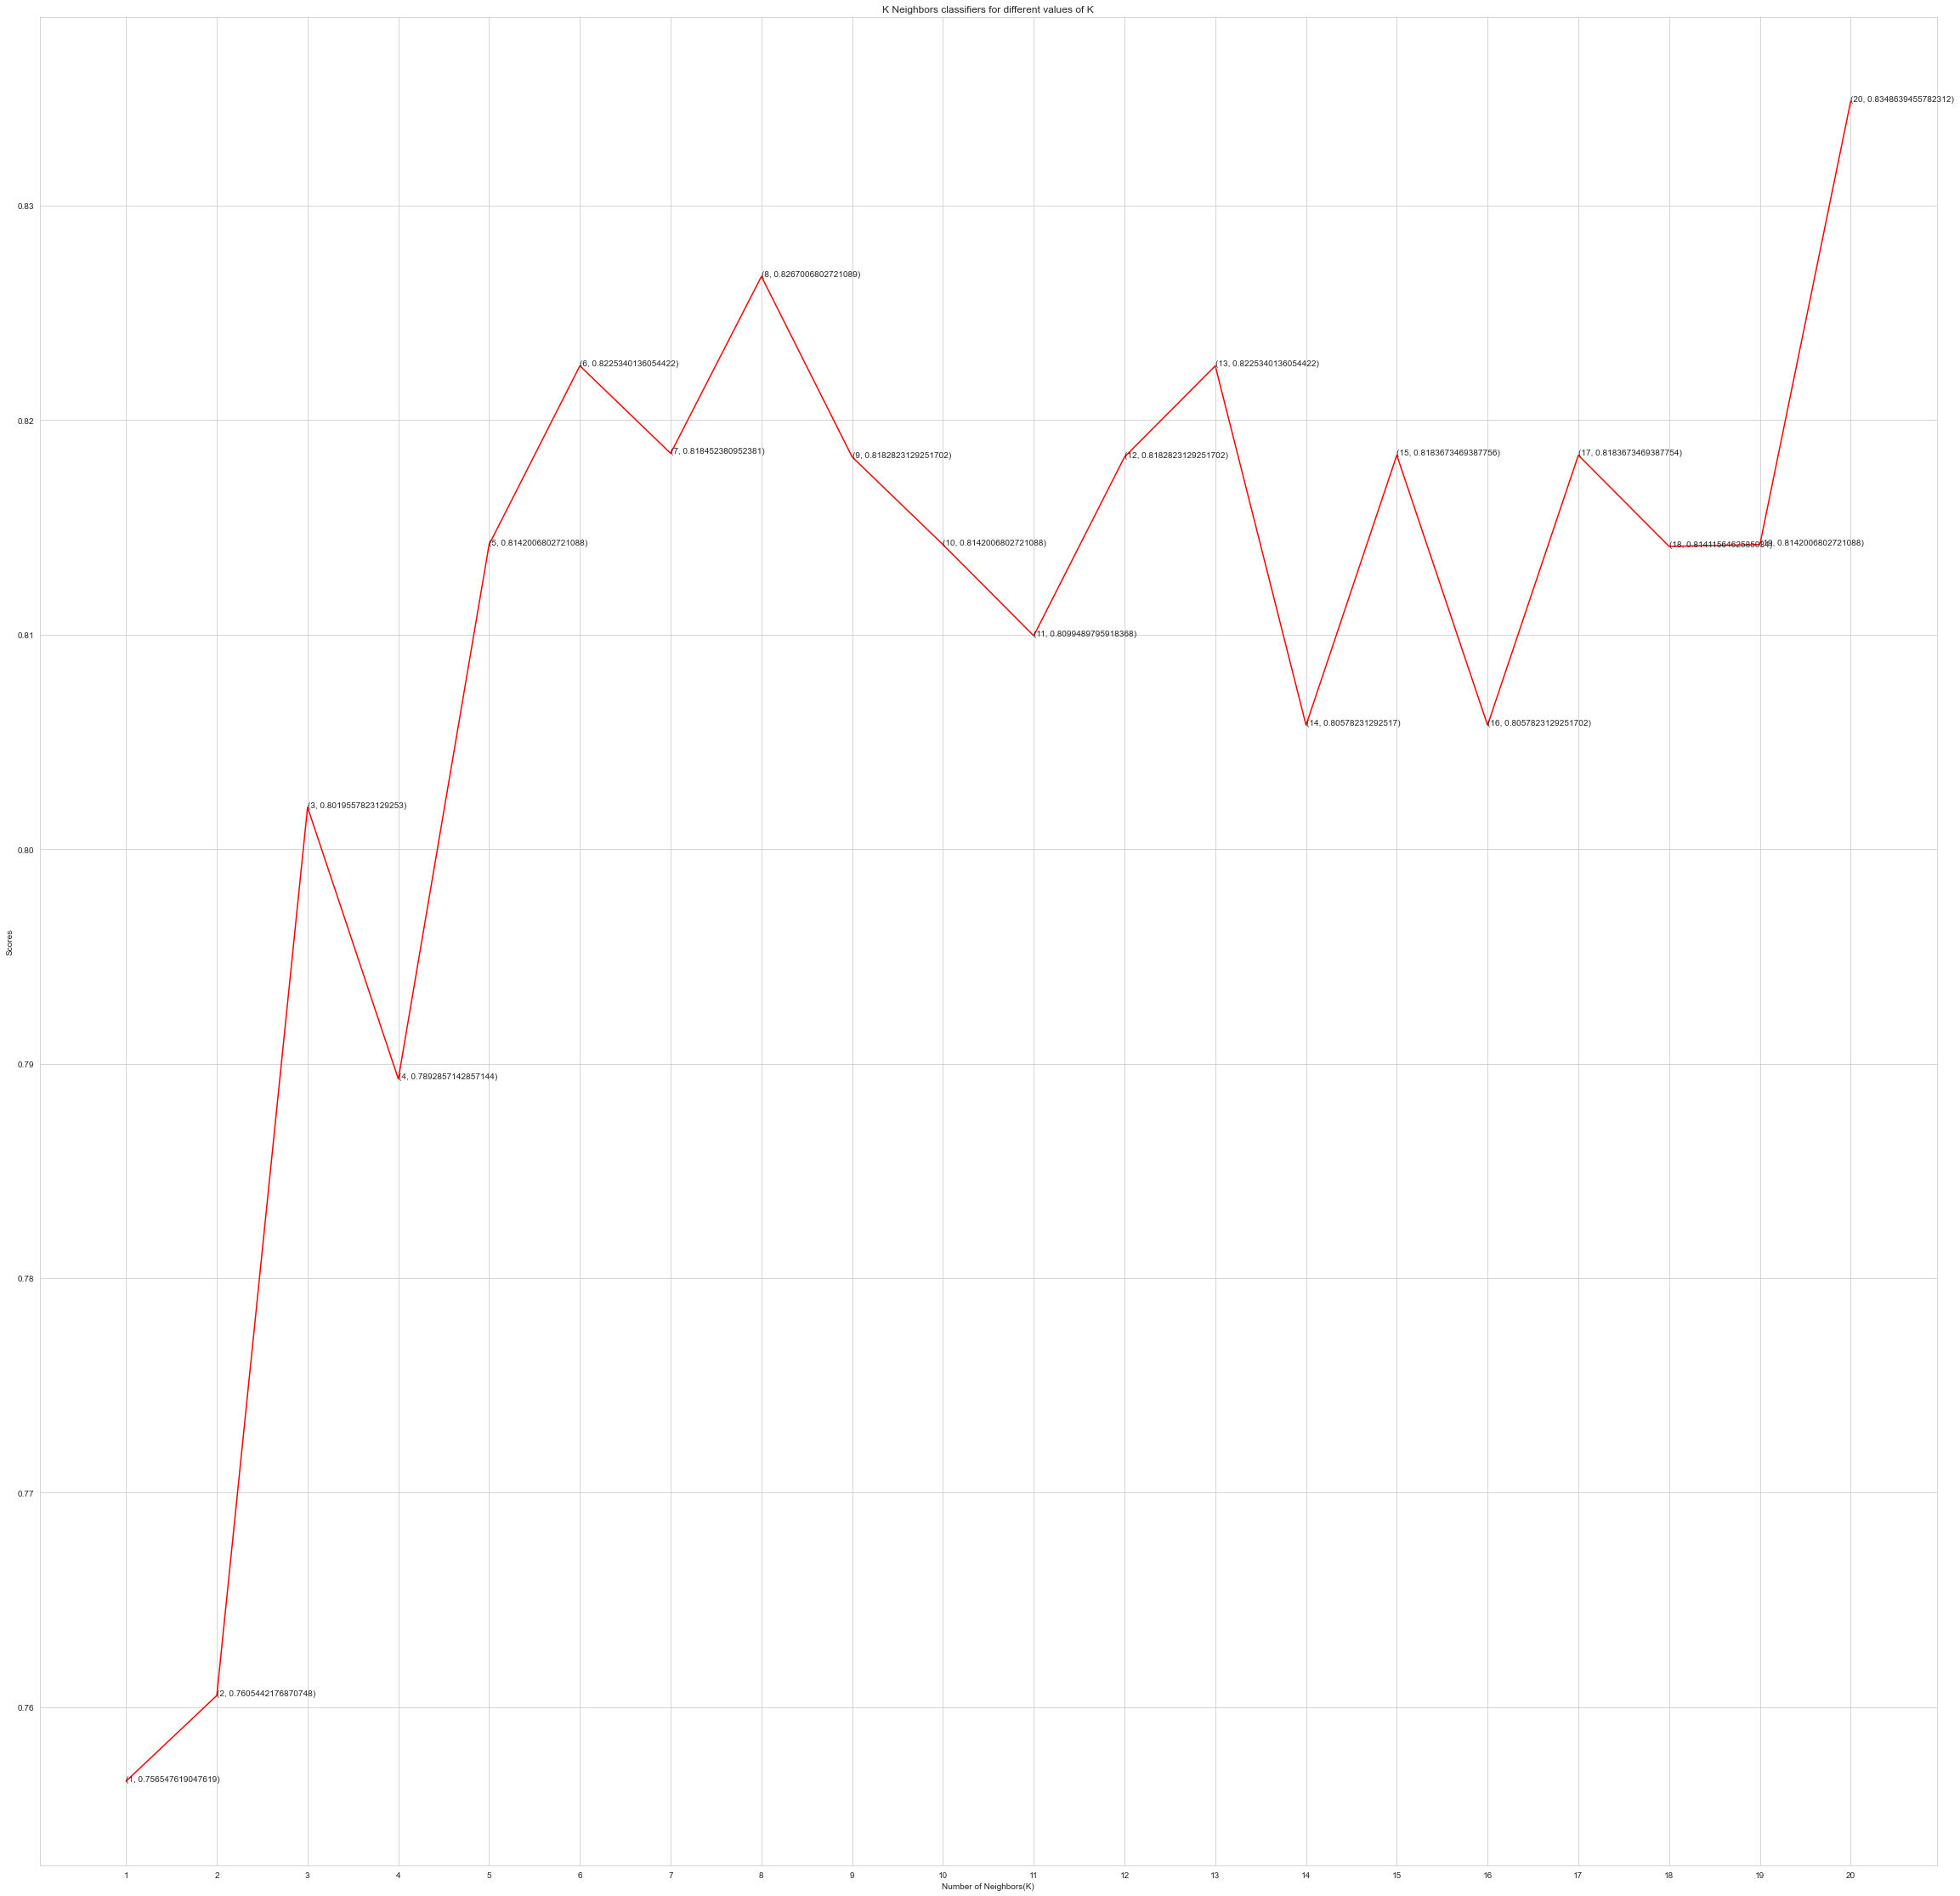

In [52]:
plt.figure(figsize=(40,40))
plt.plot([k for k in range(1,21)],neighbors_score,color='red')
for i in range(1,21):
    plt.text(i,neighbors_score[i-1],(i,neighbors_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Scores')


plt.title('K Neighbors classifiers for different values of K')
plt.savefig('KNN.png')

as seen above in the plot the neighbors with the highes crossvalidation accuracy is 19. So we will retrain the model with the n_neighbors=19

In [63]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)
score=cross_val_score(knn,x_train,y_train,cv=5)

In [70]:
from sklearn.metrics import accuracy_score

In [78]:
print("cross validation accuracy : ",score.mean())
print("testing accuracy :  ",accuracy_score(knn.predict(x_test),y_test))

cross validation accuracy :  0.8142006802721088
testing accuracy :   0.819672131147541


## as seen above our KNearestNeighbors with testing accuracy of 81% and training accuracy of 81% fit the model and there is no case of overfitting and underfitting 

In [54]:
from joblib import dump,load

In [75]:
dump(knn,'KNN_81.joblib')
#saving model using joblib

['KNN_81.joblib']

### Logistic regression

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [80]:
from sklearn.linear_model import LogisticRegression

In [83]:
log=LogisticRegression()
log.fit(x_train,y_train)
score=cross_val_score(log,x_train,y_train,cv=5)

In [84]:
print("cross validation accuracy : ",score.mean())
print("testing accuracy : ",accuracy_score(log.predict(x_test),y_test))

cross validation accuracy :  0.8473639455782314
testing accuracy :  0.8688524590163934


In [85]:
## Applying hyperparameter tuning in logistic regression


In [87]:
logModel=LogisticRegression()

param_grid=[{'penalty':['l1','l2','elasticnet','none'],
            'C':np.logspace(-4,4,20),
            'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter':[100,1000,2500,5000]}]



In [88]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(logModel,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)

In [90]:
best_clf=clf.fit(x_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 6312 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 7664 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 7985 out of 8000 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  1.2min finished


In [99]:
best_clf.best_estimator_

LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')

In [93]:
print("training accuracy : ",best_clf.score(x_train,y_train))
print("Testing accuracy : ",accuracy_score(best_clf.predict(x_test),y_test))

training accuracy :  0.8677685950413223
Testing accuracy :  0.8688524590163934


after done with hyperparameter tuning our logistic regerrssion model takes the folowwing parameter <br>
<b>LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')</b>

<br>
and gives us the training accuracy of 86.77% and the testing accuracy of 86.88%.

In [100]:
dump(best_clf,'logistic_regression_86.joblib')

['logistic_regression_86.joblib']

## SUPPORT VECTOR MACHINE 

In [104]:
svc=SVC()
svc.fit(x_train,y_train)
score=cross_val_score(svc,x_train,y_train,cv=5)
print("cross validation accuracy : ",score.mean())
print("testing accuracy : ",accuracy_score(svc.predict(x_test),y_test))

cross validation accuracy :  0.8267006802721089
testing accuracy :  0.8524590163934426


without the hyperr>arameter optimization the accuracy for cross validation is 82.67% while the accuracy for testing dataset is 85%<br>
applying hyperparameter optimization on SVC classifer

In [105]:
svc_model=SVC(gamma='auto')
param_grid={'C':[0.1,1,10,100],
           'gamma':[1,0.1,0.01,0.001],
           'kernel':['rbf']}

from sklearn.model_selection import RandomizedSearchCV

rf_grid=RandomizedSearchCV(estimator=svc_model,param_distributions=param_grid,cv=5,verbose=2,n_jobs=4)

In [107]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  43 out of  50 | elapsed:    2.4s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.4s finished


RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [108]:
rf_grid.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 1}

In [109]:
rf_grid.estimator

SVC(gamma='auto')

In [112]:
print("training accuracy : ",rf_grid.score(x_train,y_train))
print("Testing accuracy : ",accuracy_score(rf_grid.predict(x_test),y_test))

training accuracy :  0.871900826446281
Testing accuracy :  0.8524590163934426


In [113]:
mod=SVC(gamma='auto')
grid_cv=RandomizedSearchCV(estimator=svc_model,param_distributions=param_grid,cv=5,verbose=2,n_jobs=4)

In [114]:
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_jobs=4,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [115]:
grid_cv.best_estimator_

SVC(C=100, gamma=0.001)

In [116]:
grid_cv.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}

In [117]:
print("training accuracy : ",grid_cv.score(x_train,y_train))
print("Testing accuracy : ",accuracy_score(grid_cv.predict(x_test),y_test))

training accuracy :  0.8636363636363636
Testing accuracy :  0.8360655737704918


In [118]:
dump(rf_grid,'SVC_85.joblib')

['SVC_85.joblib']

In [120]:
k=load('SVC_85.joblib')


In [123]:
a=x_test.iloc[0]

In [124]:
a.shape

(30,)

In [132]:
x=np.expand_dims(a,axis=0)

In [133]:
x.shape

(1, 30)

In [137]:
print(int(k.predict(x)))

0


# Decision tree classifier 

In [29]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
score=cross_val_score(dt,x_train,y_train,cv=5)
print("cross validation accuracy ",score.mean())
print("testing accuracy ",accuracy_score(dt.predict(x_test),y_test))

cross validation accuracy  0.7361394557823129
testing accuracy  0.7377049180327869


In [30]:
from sklearn import tree

[Text(170.015625, 205.35999999999999, 'X[28] <= 0.5\ngini = 0.496\nsamples = 242\nvalue = [110, 132]'),
 Text(96.40446428571428, 181.2, 'X[4] <= -0.12\ngini = 0.373\nsamples = 113\nvalue = [85, 28]'),
 Text(50.81785714285714, 157.04, 'X[2] <= -0.111\ngini = 0.5\nsamples = 39\nvalue = [19, 20]'),
 Text(29.892857142857142, 132.88, 'X[22] <= 0.5\ngini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(17.935714285714287, 108.72, 'X[0] <= -1.419\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(11.957142857142857, 84.56, 'X[8] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(5.978571428571429, 60.400000000000006, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(17.935714285714287, 60.400000000000006, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(23.914285714285715, 84.56, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(41.85, 108.72, 'X[0] <= 0.346\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(35.871428571428574, 84.56, 'X[2] <= -0.353\ngini = 0.444\nsamples = 3\n

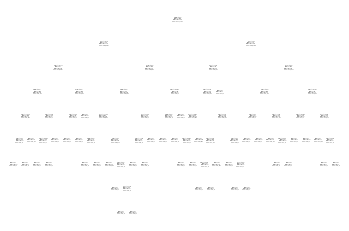

In [31]:
tree.plot_tree(dt)

In [36]:
dt_model=DecisionTreeClassifier()
param_grid={'max_depth':(10,30,50,70,90,100),
           'criterion':('gini','entropy'),
           'max_depth':(3,5,7,9,10),
           'max_features':('auto','sqrt','log2'),
           'min_samples_split':(2,4,6)}


In [37]:
grid_cv=GridSearchCV(dt_model,param_grid=param_grid,cv=5,verbose=True)

In [38]:
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    4.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 5, 7, 9, 10),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_split': (2, 4, 6)},
             verbose=True)

In [39]:
grid_cv.estimator

DecisionTreeClassifier()

In [40]:
grid_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt')

In [41]:
print("training accuracy :",grid_cv.score(x_train,y_train))
print("testing acccuracy : ",accuracy_score(grid_cv.predict(x_test),y_test))

training accuracy : 0.9256198347107438
testing acccuracy :  0.7868852459016393


# Random Forest 

In [43]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
score=cross_val_score(rf_model,x_train,y_train,cv=5)
print("training accuracy : ",score.mean())
print("testing acccuracy : ",accuracy_score(rf_model.predict(x_test),y_test))

training accuracy :  0.8311224489795919
testing acccuracy :  0.7868852459016393


In [44]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [46]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [47]:
rf_Model = RandomForestClassifier()

In [48]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [49]:
rf_Grid.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   21.1s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   31.9s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   43.2s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [51]:
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.860
Test Accuracy - : 0.803


In [52]:
rf_Grid.best_params_


{'bootstrap': False,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 56}

radom forest has an accuracy of testing accuracy of 80%


In [55]:
dump(rf_Grid,"Random_Forest_80.joblib")

['Random_Forest_80.joblib']

In [56]:
rf_Grid.predict(np.expand_dims(x_test.iloc[0],axis=0))

array([0], dtype=int64)

In [58]:
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(x_train,y_train)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("training accuracy with Naive Bayes  : ",scores.mean())
print("testing Accuracy with Nayive Bayes: ", accuracy_score(clf.predict(x_test),y_test))

training accuracy with Naive Bayes  :  0.7484999999999999
testing Accuracy with Nayive Bayes:  0.7213114754098361


In [59]:
dump(clf,'NB_72.joblib')

['NB_72.joblib']

### we have trained our model using hyperparameter tuning on 6 different classification algorithms tofint the top most accuracy of our model

In [60]:
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [61]:
data.to_csv('heart_data_after_preprocessing.csv')